In [2]:
import cv2
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import os

In [3]:
data_df = pd.read_csv("/home/mykang/mmsegmentation/_EDA/train_split_0.csv")
cnt = 0

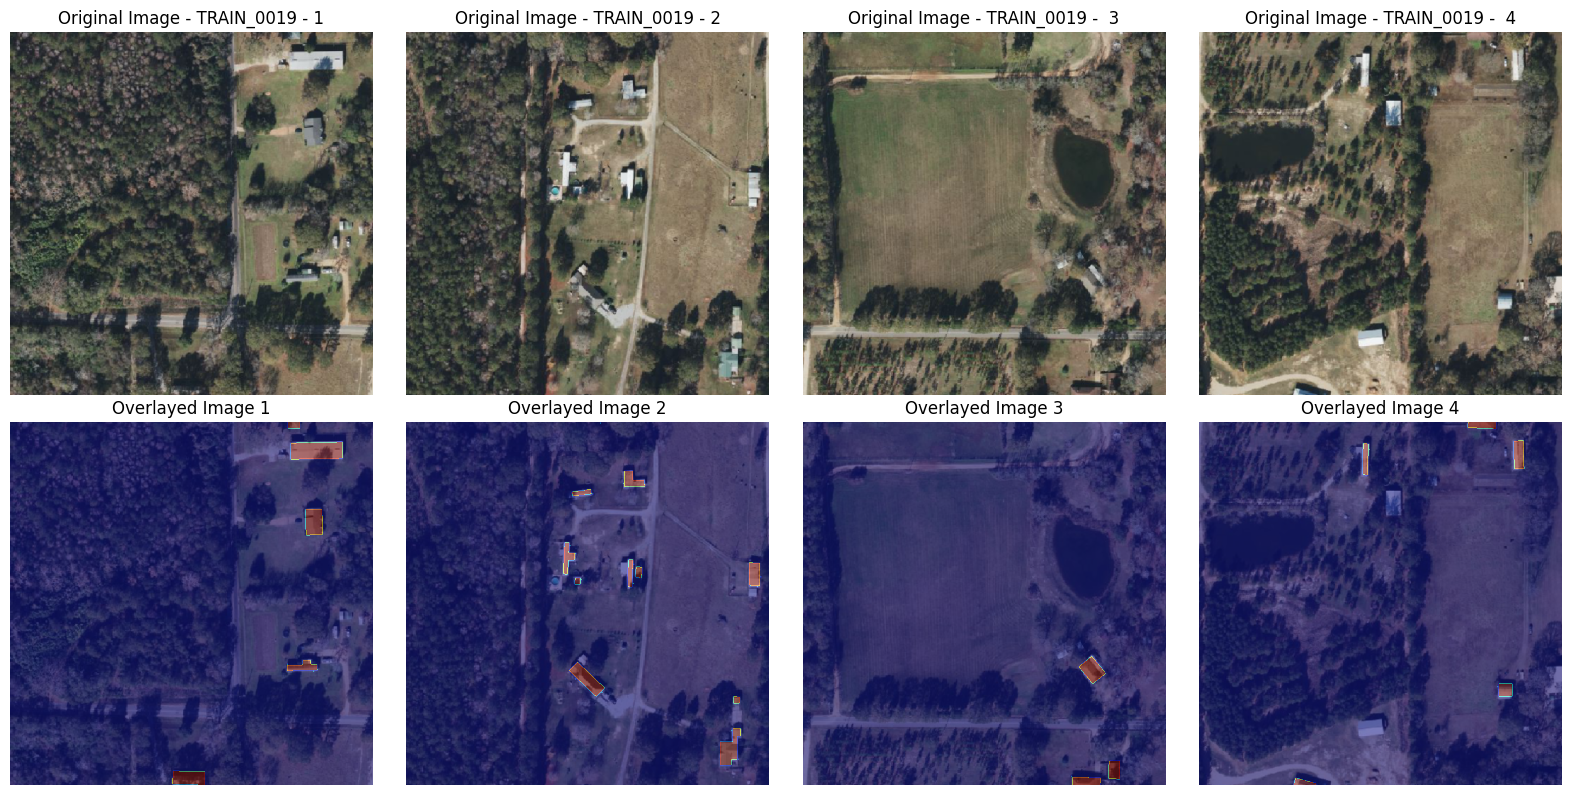

In [23]:
train_id, path, mask_rle, split = data_df.iloc[cnt]

if split == 0:
    # Load the image and mask data
    image = plt.imread(f'/home/mykang/mmsegmentation/data/Satellite/img_dir/train/{train_id}.png')  # Replace 'image.jpg' with the path to your image file
    mask = plt.imread(f'/home/mykang/mmsegmentation/data/Satellite/ann_dir/train/{train_id}.png')  # Replace 'mask.jpg' with the path to your mask file

else:
    # Load the image and mask data
    image = plt.imread(f'/home/mykang/mmsegmentation/data/Satellite/img_dir/val/{train_id}.png')  # Replace 'image.jpg' with the path to your image file
    mask = plt.imread(f'/home/mykang/mmsegmentation/data/Satellite/ann_dir/val/{train_id}.png')  # Replace 'mask.jpg' with the path to your mask file

image_parts = [
    image[:512, :512, :],
    image[:512, 512:, :],
    image[512:, :512, :],
    image[512:, 512:, :],
]

mask_parts = [
    mask[:512, :512],
    mask[:512, 512:],
    mask[512:, :512],
    mask[512:, 512:],
]

# Create subplots for eight images
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Plot the original and overlayed images for each part
for i in range(2):
    axs[0, i].imshow(image_parts[i*2])
    axs[0, i].set_title(f'Original Image - {train_id} - {i+1}')
    axs[0, i].axis('off')

    axs[1, i].imshow(image_parts[i*2])
    axs[1, i].imshow(mask_parts[i*2], alpha=0.5, cmap='jet')
    axs[1, i].set_title(f'Overlayed Image {i+1}')
    axs[1, i].axis('off')

    axs[0, i+2].imshow(image_parts[i*2+1])
    axs[0, i+2].set_title(f'Original Image - {train_id} -  {i+3}')
    axs[0, i+2].axis('off')

    axs[1, i+2].imshow(image_parts[i*2+1])
    axs[1, i+2].imshow(mask_parts[i*2+1], alpha=0.5, cmap='jet')
    axs[1, i+2].set_title(f'Overlayed Image {i+3}')
    axs[1, i+2].axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

cnt += 1